In [1]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

Excercise 1 - generate data

In [2]:
F=len('jhon')
L=len('velasquez')
N=(L+F)*100
N

1300

In [13]:
model_1 = CmdStanModel(stan_file='code_1.stan')
data_1=dict(
    N=N
)
result_1 = model_1.sample(data=data_1, chains = 4)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:   1 / 1000 [  0%]  (Sampling)



chain 1 |█▎        | 00:00 Iteration: 100 / 1000 [ 10%]  (Sampling)


chain 1 |█▊        | 00:00 Iteration: 200 / 1000 [ 20%]  (Sampling)

chain 1 |██▎       | 00:00 Iteration: 300 / 1000 [ 30%]  (Sampling)


chain 1 |██▋       | 00:00 Iteration: 400 / 1000 [ 40%]  (Sampling)


chain 1 |███▏      | 00:01 Iteration: 500 / 1000 [ 50%]  (Sampling)


chain 1 |███▋      | 00:01 Iteration: 600 / 1000 [ 60%]  (Sampling)


chain 1 |████      | 00:01 Iteration: 700 / 1000 [ 70%]  (Sampling)


chain 1 |████▌     | 00:01 Iteration: 800 / 1000 [ 80%]  (Sampling)


chain 1 |█████     | 00:01 Iteration: 900 / 1000 [ 90%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                      
chain 2 |██████████| 00:01 Sampling completed                      
chain 3 |██████████| 00:01 Sampling 


INFO:cmdstanpy:CmdStan done processing.


In [15]:
result_1.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,0.000,NaN,0.000000e+00,0.00,0.0000,0.00,NaN,NaN,NaN
theta,0.010,NaN,2.400000e-16,0.01,0.0100,0.01,NaN,NaN,NaN
y[1],0.110,0.028,1.800000e+00,-1.60,0.0051,1.70,4044.0,597.0,1.0
y[2],0.120,0.028,1.800000e+00,-1.60,0.0055,1.80,4037.0,596.0,1.0
y[3],0.120,0.029,1.800000e+00,-1.60,-0.0110,1.70,3996.0,590.0,1.0
...,...,...,...,...,...,...,...,...,...
y[1296],0.130,0.027,1.700000e+00,-1.60,0.0310,1.70,4104.0,606.0,1.0
y[1297],0.150,0.033,2.000000e+00,-1.70,0.0140,1.80,3897.0,576.0,1.0
y[1298],0.065,0.028,1.700000e+00,-1.60,-0.0170,1.60,3531.0,522.0,1.0


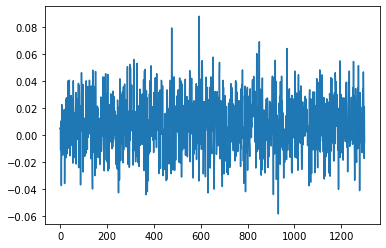

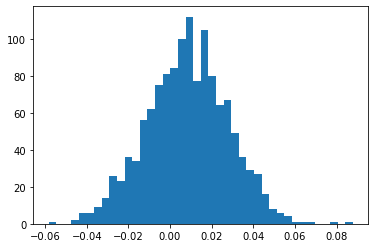

In [31]:
y1_median=np.percentile(result_1.stan_variable('y')[:,:],50,axis=0)
plt.plot(y1_median)
plt.show()
plt.hist(y1_median,bins=40)
plt.show()

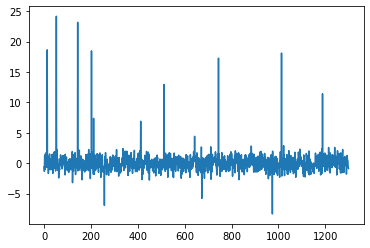

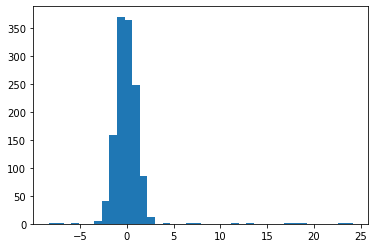

In [14]:
plt.plot(result_1.stan_variable('y')[0])
plt.show()
plt.hist(result_1.stan_variable('y')[0],bins=40)
plt.show()

In [3]:
model_2 = CmdStanModel(stan_file='code_2.stan')
data_2=dict(
    N=N
)
result_2 = model_2.sample(data=data_2, chains = 4)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:   1 / 1000 [  0%]  (Sampling)





chain 1 |█▎        | 00:01 Iteration: 100 / 1000 [ 10%]  (Sampling)
chain 1 |█▊        | 00:02 Iteration: 200 / 1000 [ 20%]  (Sampling)


chain 1 |██▎       | 00:02 Iteration: 300 / 1000 [ 30%]  (Sampling)


chain 1 |██▋       | 00:03 Iteration: 400 / 1000 [ 40%]  (Sampling)


chain 1 |███▏      | 00:04 Iteration: 500 / 1000 [ 50%]  (Sampling)


chain 1 |███▋      | 00:04 Iteration: 600 / 1000 [ 60%]  (Sampling)


chain 1 |████      | 00:05 Iteration: 700 / 1000 [ 70%]  (Sampling)


chain 1 |████▌     | 00:05 Iteration: 800 / 1000 [ 80%]  (Sampling)


chain 1 |█████     | 00:06 Iteration: 900 / 1000 [ 90%]  (Sampling)

chain 1 |██████████| 00:06 Sampling completed                      
chain 2 |██████████| 00:06 Sampling completed                      
chain 3 |██████████| 00:06 Sampling 


INFO:cmdstanpy:CmdStan done processing.


In [7]:
result_2.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,0.00000,NaN,0.00,0.0,0.0000,0.0,NaN,NaN,NaN
"X[1,1]",-0.00630,0.016,1.00,-1.6,0.0130,1.6,3815.0,145.0,1.0
"X[1,2]",0.00920,0.016,1.00,-1.7,0.0049,1.7,3882.0,148.0,1.0
"X[1,3]",0.00320,0.015,0.99,-1.6,-0.0100,1.6,4106.0,156.0,1.0
"X[2,1]",0.00930,0.016,1.00,-1.7,0.0110,1.7,4017.0,153.0,1.0
...,...,...,...,...,...,...,...,...,...
y[1296],-0.04400,0.040,2.60,-4.3,-0.0500,4.1,4062.0,155.0,1.0
y[1297],-0.06900,0.039,2.40,-4.1,-0.0650,4.0,3994.0,152.0,1.0
y[1298],-0.02300,0.040,2.50,-4.1,-0.0730,4.1,4012.0,153.0,1.0


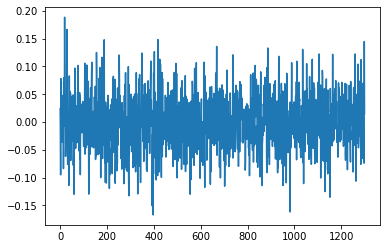

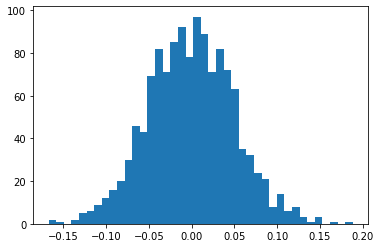

In [32]:
y2_median=np.percentile(result_2.stan_variable('y')[:,:],50,axis=0)
plt.plot(y2_median)
plt.show()
plt.hist(y2_median,bins=40)
plt.show()

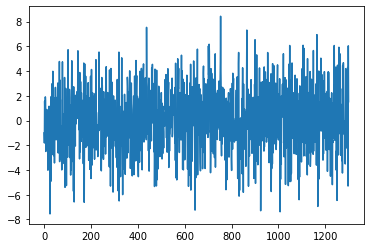

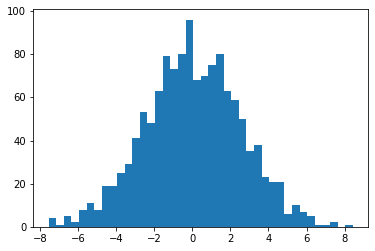

In [33]:
plt.plot(result_2.stan_variable('y')[100])
plt.show()
plt.hist(result_2.stan_variable('y')[100],bins=40)
plt.show()

Excercise 2 - compare normal and student models for data from first file


2.1 Compile both models


In [35]:
model_3 = CmdStanModel(stan_file='code_3.stan')
data_3_1=dict(
    N=len(y1_median),
    y=y1_median,
)
data_3_2=dict(
    N=len(y2_median),
    y=y2_median,
)

INFO:cmdstanpy:found newer exe file, not recompiling


In [38]:
model_4 = CmdStanModel(stan_file='code_4.stan')
data_4_1=dict(
    N=len(y1_median),
    y=y1_median,
)
data_4_2=dict(
    N=len(y2_median),
    y=y2_median,
)

INFO:cmdstanpy:compiling stan file E:\AGH\2022-1\2_Data_Analytics\lab7\code_4.stan to exe file E:\AGH\2022-1\2_Data_Analytics\lab7\code_4.exe
INFO:cmdstanpy:compiled model executable: E:\AGH\2022-1\2_Data_Analytics\lab7\code_4.exe


2.2 Fit both models

In [36]:
result_3_1 = model_3.sample(data=data_3_1, chains = 4)
result_3_1.summary()

INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████▌| 00:02 Iteration: 1800 / 2000 [ 90%]  (Sampling)




chain 1 |██████████| 00:03 Iteration: 1900 / 2000 [ 95%]  (Sampling)
chain 1 |██████████| 00:03 Sampling completed                       
chain 2 |██████████| 00:03 Sampling completed                       
chain 3 |██████████| 00:03 Sampling completed                       
chain 4 |██████████| 00:03 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,3300.0000,0.030000,1.00000,3300.0000,3300.0000,3300.0000,1200.0,92.0,1.0
sigma,0.0200,0.000015,0.00040,0.0190,0.0200,0.0200,700.0,56.0,1.0
mu,0.0083,0.000009,0.00056,0.0074,0.0084,0.0092,4000.0,320.0,1.0
log_lik[1],3.0000,0.000750,0.02000,3.0000,3.0000,3.0000,726.0,58.0,1.0
log_lik[2],3.0000,0.000760,0.02000,3.0000,3.0000,3.0000,714.0,57.0,1.0
...,...,...,...,...,...,...,...,...,...
y_hat[1296],0.0088,0.000300,0.01900,-0.0230,0.0085,0.0420,4200.0,335.0,1.0
y_hat[1297],0.0087,0.000320,0.02000,-0.0230,0.0083,0.0410,3852.0,307.0,1.0
y_hat[1298],0.0080,0.000320,0.02000,-0.0250,0.0080,0.0400,3804.0,304.0,1.0


In [37]:
result_3_2 = model_3.sample(data=data_3_2, chains = 4)
result_3_2.summary()

INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:03 Sampling completed                       
chain 2 |██████████| 00:03 Sampling completed                       
chain 3 |██████████| 00:03 Sampling completed                       
chain 4 |██████████| 00:03 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,2000.000000,0.027000,0.9900,2000.000,2000.00000,2000.0000,1300.0,110.0,1.0
sigma,0.050000,0.000032,0.0010,0.049,0.05000,0.0520,1000.0,79.0,1.0
mu,-0.000640,0.000021,0.0014,-0.003,-0.00065,0.0016,4400.0,350.0,1.0
log_lik[1],1.900000,0.000510,0.0200,1.900,1.90000,2.0000,1593.0,127.0,1.0
log_lik[2],2.000000,0.000570,0.0200,1.900,2.00000,2.0000,1242.0,99.0,1.0
...,...,...,...,...,...,...,...,...,...
y_hat[1296],0.001000,0.000800,0.0510,-0.083,0.00091,0.0850,4065.0,323.0,1.0
y_hat[1297],-0.001400,0.000810,0.0510,-0.086,-0.00069,0.0820,4068.0,323.0,1.0
y_hat[1298],-0.000930,0.000790,0.0510,-0.085,-0.00086,0.0820,4135.0,329.0,1.0


In [46]:
result_4_1 = model_4.sample(data=data_4_1, chains = 4)
result_4_1.summary()

INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)



chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)







chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:02 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:03 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:03 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:04 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:04 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 


INFO:cmdstanpy:CmdStan done processing.


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,3300.0000,0.033000,1.20000,3300.0000,3300.0000,3300.0000,1300.0,69.0,1.0
sigma,0.0190,0.000011,0.00044,0.0180,0.0190,0.0200,1600.0,88.0,1.0
mu,0.0084,0.000008,0.00053,0.0075,0.0084,0.0092,4300.0,240.0,1.0
nu,36.0000,0.380000,14.00000,18.0000,33.0000,63.0000,1400.0,78.0,1.0
log_lik[1],3.0000,0.000520,0.02200,3.0000,3.0000,3.1000,1766.0,96.0,1.0
...,...,...,...,...,...,...,...,...,...
y_hat[1296],0.0084,0.000290,0.01900,-0.0240,0.0086,0.0390,4323.0,235.0,1.0
y_hat[1297],0.0080,0.000310,0.02000,-0.0240,0.0082,0.0400,3997.0,217.0,1.0
y_hat[1298],0.0084,0.000320,0.02000,-0.0240,0.0086,0.0420,3818.0,208.0,1.0


In [40]:
result_4_2 = model_4.sample(data=data_4_2, chains = 4)
result_4_2.summary()

INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status











chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)
chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:02 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:03 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:03 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:03 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:04 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:05 Sampling completed                       
chain 2 |██████████| 00:05 Sampling completed                       
chain 3 |██████████| 00:05 Sampling completed                       
chain 4 |


INFO:cmdstanpy:CmdStan done processing.


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,2000.00000,0.031000,1.2000,2000.000,2000.00000,2000.0000,1500.0,89.0,1.0
sigma,0.04800,0.000031,0.0012,0.046,0.04800,0.0500,1600.0,94.0,1.0
mu,-0.00072,0.000019,0.0014,-0.003,-0.00074,0.0016,5200.0,310.0,1.0
nu,31.00000,0.330000,13.0000,15.000,29.00000,58.0000,1600.0,95.0,1.0
log_lik[1],2.00000,0.000440,0.0220,1.900,2.00000,2.0000,2471.0,145.0,1.0
...,...,...,...,...,...,...,...,...,...
y_hat[1296],-0.00050,0.000790,0.0500,-0.082,-0.00070,0.0810,3996.0,234.0,1.0
y_hat[1297],-0.00100,0.000800,0.0500,-0.083,-0.00052,0.0800,3811.0,224.0,1.0
y_hat[1298],-0.00110,0.000790,0.0500,-0.081,-0.00130,0.0830,4059.0,238.0,1.0


2.3 Using az.compare and az.plot_compare analyze both models using loo and waic criteria.

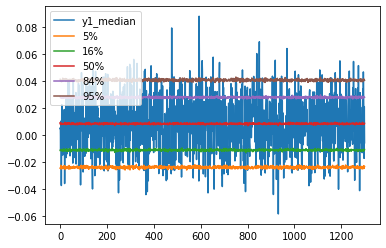

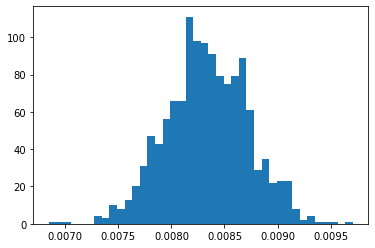

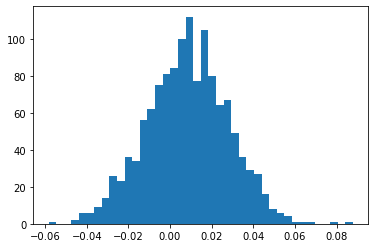

In [57]:
med_prob_ppc_3_1 = np.percentile(result_3_1.stan_variable('y_hat'),[5,16,50,84,95],axis=0)
med_prob_ppc = med_prob_ppc_3_1
plt.plot(y1_median)
plt.plot(med_prob_ppc[0])
plt.plot(med_prob_ppc[1])
plt.plot(med_prob_ppc[2])
plt.plot(med_prob_ppc[3])
plt.plot(med_prob_ppc[4])
labels= [ "y1_median", "5%", "16%", "50%", "84%", "95%"]
plt.legend(labels)
plt.show()

y_hat_3_1_median=np.percentile(result_3_1.stan_variable('y_hat')[:,:],50,axis=0)
plt.hist(y_hat_3_1_median,bins=40)
plt.show()
plt.hist(y1_median,bins=40)
plt.show()

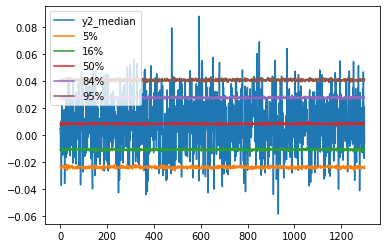

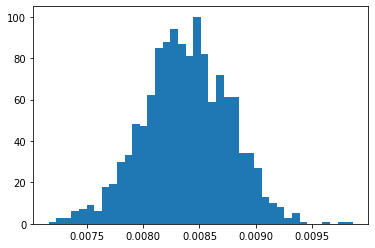

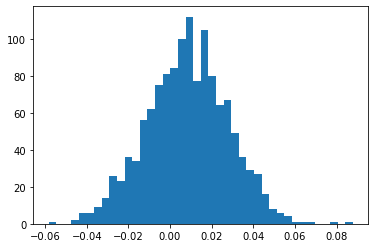

In [64]:
med_prob_ppc_4_1 = np.percentile(result_4_1.stan_variable('y_hat'),[5,16,50,84,95],axis=0)
med_prob_ppc = med_prob_ppc_4_1
plt.plot(y1_median)
plt.plot(med_prob_ppc[0])
plt.plot(med_prob_ppc[1])
plt.plot(med_prob_ppc[2])
plt.plot(med_prob_ppc[3])
plt.plot(med_prob_ppc[4])
labels= [ "y2_median", "5%", "16%", "50%", "84%", "95%"]
plt.legend(labels)
plt.show()

y_hat_4_1_median=np.percentile(result_4_1.stan_variable('y_hat')[:,:],50,axis=0)
plt.hist(y_hat_4_1_median,bins=40)
plt.show()
plt.hist(y1_median,bins=40)
plt.show()

<AxesSubplot:xlabel='Log'>

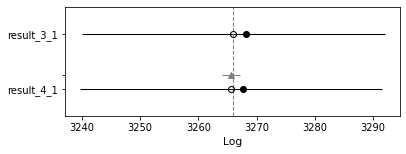

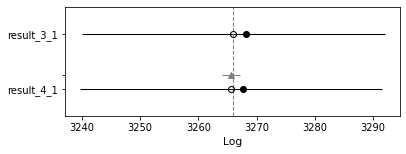

In [75]:
results_1 = {'result_3_1': result_3_1,'result_4_1': result_4_1}
comparisson_waic_1 = az.compare(results_1, ic = 'waic')
az.plot_compare(comparisson_waic_1)
comparisson_loo_1 = az.compare(results_1, ic = 'loo')
az.plot_compare(comparisson_loo_1)

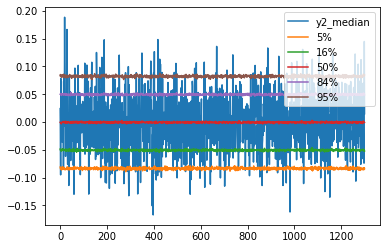

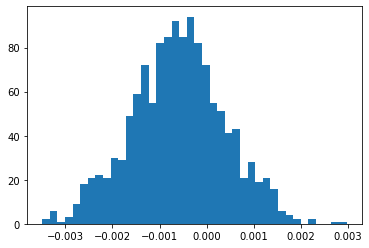

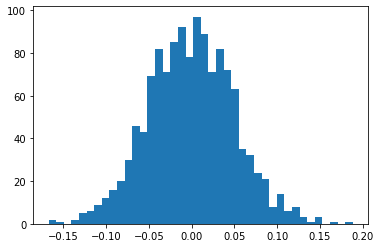

In [62]:
med_prob_ppc_3_2 = np.percentile(result_3_2.stan_variable('y_hat'),[5,16,50,84,95],axis=0)
med_prob_ppc = med_prob_ppc_3_2
plt.plot(y2_median)
plt.plot(med_prob_ppc[0])
plt.plot(med_prob_ppc[1])
plt.plot(med_prob_ppc[2])
plt.plot(med_prob_ppc[3])
plt.plot(med_prob_ppc[4])
labels= [ "y2_median", "5%", "16%", "50%", "84%", "95%"]
plt.legend(labels)
plt.show()

y_hat_3_2_median=np.percentile(result_3_2.stan_variable('y_hat')[:,:],50,axis=0)
plt.hist(y_hat_3_2_median,bins=40)
plt.show()
plt.hist(y2_median,bins=40)
plt.show()

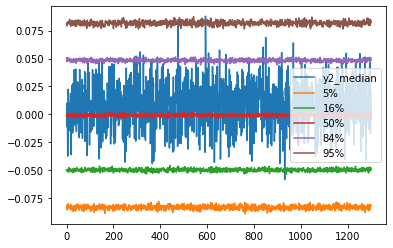

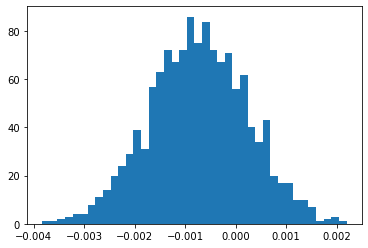

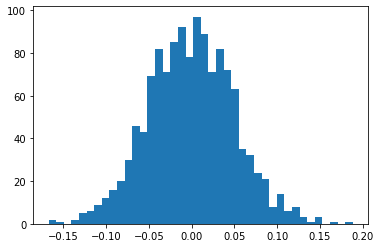

In [63]:
med_prob_ppc_4_2 = np.percentile(result_4_2.stan_variable('y_hat'),[5,16,50,84,95],axis=0)
med_prob_ppc = med_prob_ppc_4_2
plt.plot(y1_median)
plt.plot(med_prob_ppc[0])
plt.plot(med_prob_ppc[1])
plt.plot(med_prob_ppc[2])
plt.plot(med_prob_ppc[3])
plt.plot(med_prob_ppc[4])
labels= [ "y2_median", "5%", "16%", "50%", "84%", "95%"]
plt.legend(labels)
plt.show()

y_hat_4_2_median=np.percentile(result_4_2.stan_variable('y_hat')[:,:],50,axis=0)
plt.hist(y_hat_4_2_median,bins=40)
plt.show()
plt.hist(y2_median,bins=40)
plt.show()

<AxesSubplot:xlabel='Log'>

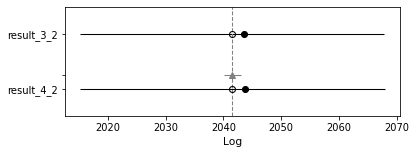

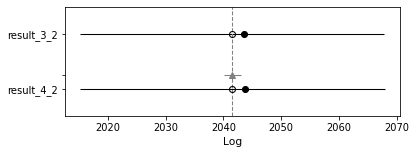

In [74]:
results_2 = {'result_3_2': result_3_2,'result_4_2': result_4_2}
comparisson_waic_2 = az.compare(results_2, ic = 'waic')
az.plot_compare(comparisson_waic_2)
comparisson_loo_2 = az.compare(results_2, ic = 'loo')
az.plot_compare(comparisson_loo_2)

Excercise 3 - compare models with different numbers of predictors

1. Compile model

In [205]:
x2_median_1_3=np.percentile(result_2.stan_variable('X')[:,:],50,axis=0)
x2_median_0=np.percentile(result_2.stan_variable('X')[:,:,0],50,axis=0)
x2_median_1=np.percentile(result_2.stan_variable('X')[:,:,1],50,axis=0)
x2_median_2=np.percentile(result_2.stan_variable('X')[:,:,2],50,axis=0)
x2_median_K1=x2_median_1_3[:,0:1]
x2_median_K2=x2_median_1_3[:,0:2]
x2_median_K3=x2_median_1_3[:,0:3]

In [147]:
model_5 = CmdStanModel(stan_file='code_5.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [207]:
data_5_K1=dict(
    N=N,
    K=1,
    y=y2_median,
    X=x2_median_K1
)
result_5_K1 = model_5.sample(data=data_5_K1, chains = 4)

INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status




chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)



chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)
chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)

chain 1 |██████▊   | 00:02 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▋  | 00:03 Iteration: 1400 / 2000 [ 70%]  (Sampling)
chain 1 |████████▏ | 00:04 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:05 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:06 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 1 |█████████▌| 00:06 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:07 Iteration: 1900 / 2000 [ 95%]  (Sampling)


chain 1 |██████████| 00:07 Sampling completed                       
chain 2 |██████████| 00:07 Sampling completed                       
chain 3 |██████████| 00:07 Sampling completed                       
chain 4 |██████


INFO:cmdstanpy:CmdStan done processing.


In [210]:
data_5_K2=dict(
    N=N,
    K=2,
    y=y2_median,
    X=x2_median_K2
)
result_5_K2 = model_5.sample(data=data_5_K2, chains = 4)

INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status



chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)




chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)



chain 1 |████████▏ | 00:03 Iteration: 1500 / 2000 [ 75%]  (Sampling)




chain 1 |█████████ | 00:05 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:05 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:06 Sampling completed                       
chain 2 |██████████| 00:06 Sampling completed                       
chain 3 |██████████| 00:06 Sampling completed                       
chain 4 |██████████| 00:06 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [209]:
data_5_K3=dict(
    N=N,
    K=3,
    y=y2_median,
    X=x2_median_K3
)
result_5_K3 = model_5.sample(data=data_5_K3, chains = 4)

INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status




chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)

chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)

chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)

chain 1 |████████▏ | 00:04 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:04 Iteration: 1600 / 2000 [ 80%]  (Sampling)

chain 1 |█████████ | 00:05 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:06 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:06 Iteration: 1900 / 2000 [ 95%]  (Sampling)


chain 1 |██████████| 00:06 Sampling completed                       
chain 2 |██████████| 00:06 Sampling completed                       
chain 3 |██████████| 00:06 Sampling completed                       
chain 4 |███████


INFO:cmdstanpy:CmdStan done processing.


2.Compare models for 1, 2 and 3 predictors as in previous excercise

<AxesSubplot:xlabel='Log'>

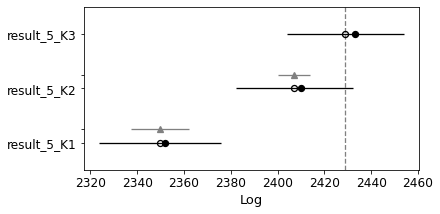

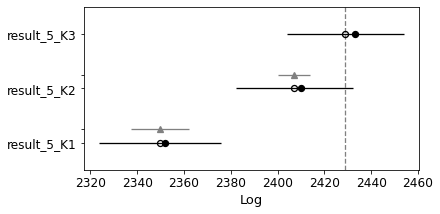

In [222]:
results_5 = {'result_5_K1': result_5_K1,'result_5_K3': result_5_K3,'result_5_K2': result_5_K2}
comparisson_waic_5 = az.compare(results_5, ic = 'waic')
az.plot_compare(comparisson_waic_5)
comparisson_loo_5 = az.compare(results_5, ic = 'loo')
az.plot_compare(comparisson_loo_5)

In [223]:
result_5_K3.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,3600.000,0.029000,1.40000,3600.000,3600.000,3600.0000,2300.0,89.0,1.0
sigma,0.037,0.000011,0.00076,0.036,0.037,0.0390,5200.0,200.0,1.0
beta[1],1.500,0.000760,0.05000,1.400,1.500,1.6000,4412.0,168.0,1.0
beta[2],0.610,0.000840,0.05400,0.520,0.610,0.7000,4107.0,156.0,1.0
beta[3],0.340,0.000810,0.05000,0.260,0.340,0.4300,3885.0,148.0,1.0
...,...,...,...,...,...,...,...,...,...
y_hat[1296],-0.058,0.000610,0.03800,-0.120,-0.058,0.0047,3830.0,146.0,1.0
y_hat[1297],-0.076,0.000590,0.03700,-0.140,-0.077,-0.0150,3936.0,150.0,1.0
y_hat[1298],-0.012,0.000620,0.03800,-0.074,-0.012,0.0490,3777.0,144.0,1.0


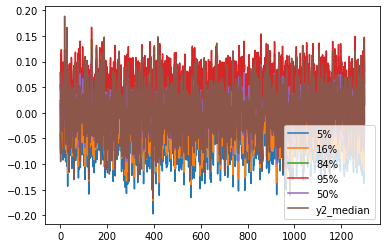

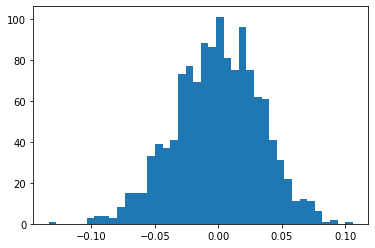

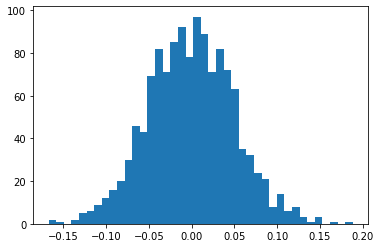

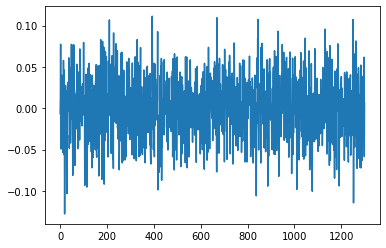

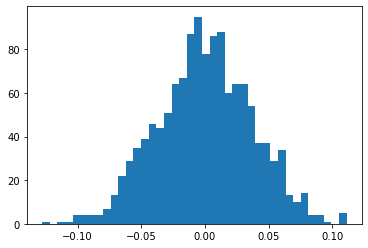

In [235]:
med_prob_ppc_5_2 = np.percentile(result_5_K3.stan_variable('y_hat'),[5,16,50,84,95],axis=0)
med_prob_ppc = med_prob_ppc_5_2
plt.plot(med_prob_ppc[0])
plt.plot(med_prob_ppc[1])
plt.plot(med_prob_ppc[3])
plt.plot(med_prob_ppc[4])
plt.plot(med_prob_ppc[2])
plt.plot(y2_median)
labels= [ "5%", "16%","84%","95%","50%","y2_median"]
plt.legend(labels)
plt.show()

y_hat_5_2_median=np.percentile(result_5_K3.stan_variable('y_hat')[:,:],50,axis=0)
plt.hist(y_hat_5_2_median,bins=40)
plt.show()
plt.hist(y2_median,bins=40)
plt.show()



err=y_hat_5_2_median-y2_median
plt.plot(err)
plt.show()
plt.hist(err,bins=40)
plt.show()
